# 1. EDA of data

## 0. Import of libreries


In [4]:
!pip install lightgbm

In [1]:
#--- LIBRERIAS
import pickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import sklearn as sklearn
from scipy import stats, special
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import json
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("orders_train.csv")

In [3]:
df.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14924129,900007722,2.188069,43.430176,5500,2017-09-17T14:36:51Z,1
1,15517560,900008156,0.970423,64.589722,5200,2017-09-28T12:33:04Z,1
2,15365462,900004503,2.699022,257.006104,6700,2017-09-25T12:43:57Z,1
3,14245605,900015422,0.725768,-42.870361,3200,2017-09-05T17:17:09Z,1
4,15213594,900011745,0.750715,-34.016602,5700,2017-09-22T21:38:58Z,1


In [4]:
df["codmes"]=pd.DatetimeIndex(df['created_at']).year*100 + pd.DatetimeIndex(df['created_at']).month

In [5]:
df.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,codmes
0,14924129,900007722,2.188069,43.430176,5500,2017-09-17T14:36:51Z,1,201709
1,15517560,900008156,0.970423,64.589722,5200,2017-09-28T12:33:04Z,1,201709
2,15365462,900004503,2.699022,257.006104,6700,2017-09-25T12:43:57Z,1,201709
3,14245605,900015422,0.725768,-42.870361,3200,2017-09-05T17:17:09Z,1,201709
4,15213594,900011745,0.750715,-34.016602,5700,2017-09-22T21:38:58Z,1,201709


In [6]:
df.shape

(117589, 8)

In [7]:
datatypes = df.dtypes 
  
datatypes

order_id               int64
store_id               int64
to_user_distance     float64
to_user_elevation    float64
total_earning          int64
created_at            object
taken                  int64
codmes                 int64
dtype: object

In [8]:
df.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken,codmes
count,1.175890e+05,1.175890e+05,117589.000000,117589.000000,117589.000000,117589.000000,117589.000000
mean,1.507706e+07,7.579606e+08,1.500964,26.834768,5353.512488,0.920800,201709.123668
std,4.747195e+05,3.215303e+08,0.846170,84.950796,1748.985437,0.270051,0.329204
min,1.421073e+07,3.000000e+07,0.000000,-598.296875,200.000000,0.000000,201709.000000
25%,1.466936e+07,9.000044e+08,0.835240,-18.395874,4200.000000,1.000000,201709.000000
50%,1.509279e+07,9.000077e+08,1.390255,11.043579,5200.000000,1.000000,201709.000000
75%,1.547337e+07,9.000127e+08,2.029655,61.114990,6300.000000,1.000000,201709.000000
max,1.590252e+07,9.000173e+08,9.360177,1009.380005,27200.000000,1.000000,201710.000000


In [9]:
df2=df[["order_id","store_id"]].groupby(["order_id"]).count()
df2

,store_id
order_id,
14210727,1
14210937,1
14211008,1
14211014,1
14211109,1
...,...
15902402,1
15902474,1
15902485,1


In [10]:
df3=df2[df2.store_id>1]
df3.shape

(34, 1)

In [11]:
df.shape

(117589, 8)

In [12]:
df2 = df2.rename(columns = {'store_id': 'duplicados'}, inplace = False)
df= df.merge(df2, on='order_id', how='left')
df.sort_values(by=['order_id'])

df=df[df.duplicados==1]

df


,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,codmes,duplicados
0,14924129,900007722,2.188069,43.430176,5500,2017-09-17T14:36:51Z,1,201709,1
1,15517560,900008156,0.970423,64.589722,5200,2017-09-28T12:33:04Z,1,201709,1
2,15365462,900004503,2.699022,257.006104,6700,2017-09-25T12:43:57Z,1,201709,1
3,14245605,900015422,0.725768,-42.870361,3200,2017-09-05T17:17:09Z,1,201709,1
4,15213594,900011745,0.750715,-34.016602,5700,2017-09-22T21:38:58Z,1,201709,1
...,...,...,...,...,...,...,...,...,...
117584,15048263,900009494,0.402109,-22.629395,6200,2017-09-19T19:42:54Z,1,201709,1
117585,15789217,900008201,0.374944,-4.408203,3200,2017-10-02T18:29:02Z,1,201710,1
117586,15636112,900009494,2.836608,-89.113770,8050,2017-09-30T13:11:03Z,0,201709,1
117587,14639888,30000253,2.724799,21.098999,3900,2017-09-12T12:33:08Z,0,201709,1


In [13]:
df.shape

(117518, 9)

In [14]:
df[["codmes","order_id"]].groupby(["codmes"]).count()


,order_id
codmes,
201709,102988
201710,14530


In [15]:
df[["taken","order_id"]].groupby(["taken"]).count()

,order_id
taken,
0,9279
1,108239


In [16]:
df_i = df[["to_user_distance","to_user_elevation","total_earning","taken"]].groupby(["taken"]).mean().reset_index()
df_i

,taken,to_user_distance,to_user_elevation,total_earning
0,0,1.759323,24.062317,5110.392176
1,1,1.478569,27.075668,5373.964569


In [17]:
df_i = df[["store_id","taken"]].groupby(["store_id"]).sum().reset_index()
df_i2 = df_i.rename(columns = {'Unnamed: 0': 'Count'}, inplace = False)
df_i2

,store_id,taken
0,30000003,89
1,30000007,296
2,30000009,343
3,30000016,65
4,30000017,4
...,...,...
837,900017032,19
838,900017107,5
839,900017241,6
840,900017244,2


In [18]:
p_20_distance=stats.scoreatpercentile(df[["to_user_distance"]], 20)
p_40_distance=stats.scoreatpercentile(df[["to_user_distance"]], 40)
p_60_distance=stats.scoreatpercentile(df[["to_user_distance"]], 60)
p_80_distance=stats.scoreatpercentile(df[["to_user_distance"]], 80)

p_20_elevation=stats.scoreatpercentile(df[["to_user_elevation"]], 20)
p_40_elevation=stats.scoreatpercentile(df[["to_user_elevation"]], 40)
p_60_elevation=stats.scoreatpercentile(df[["to_user_elevation"]], 60)
p_80_elevation=stats.scoreatpercentile(df[["to_user_elevation"]], 80)

p_20_earning=stats.scoreatpercentile(df[["total_earning"]], 20)
p_40_earning=stats.scoreatpercentile(df[["total_earning"]], 40)
p_60_earning=stats.scoreatpercentile(df[["total_earning"]], 60)
p_80_earning=stats.scoreatpercentile(df[["total_earning"]], 80)


In [19]:
df["p_to_user_distance"]=np.where(df['to_user_distance']<p_20_distance, 'p_20',
                   np.where(df['to_user_distance']<p_40_distance, 'p_40',
                   np.where(df['to_user_distance']<p_60_distance, 'p_60',
                   np.where(df['to_user_distance']<p_80_distance, 'p_80','p_max'))))

df["p_to_user_elevation"]=np.where(df['to_user_elevation']<p_20_elevation, 'p_20',
                   np.where(df['to_user_elevation']<p_40_elevation, 'p_40',
                   np.where(df['to_user_elevation']<p_60_elevation, 'p_60',
                   np.where(df['to_user_elevation']<p_80_elevation, 'p_80','p_max'))))

df["p_total_earning"]=np.where(df['total_earning']<p_20_earning, 'p_20',
                   np.where(df['total_earning']<p_40_earning, 'p_40',
                   np.where(df['total_earning']<p_60_earning, 'p_60',
                   np.where(df['total_earning']<p_80_earning, 'p_80','p_max'))))



In [20]:
df_i1 = df[["p_to_user_distance","taken"]].groupby(["p_to_user_distance"]).mean().reset_index()
df_i2= df[["p_to_user_distance","taken"]].groupby(["p_to_user_distance"]).count().reset_index()

df_i1 = df_i1.rename(columns = {'taken': 'mean_taken'}, inplace = False)
df_i2 = df_i2.rename(columns = {'taken': 'ctd_taken'}, inplace = False)

df_i3= df_i1.merge(df_i2, on='p_to_user_distance', how='left')
df_i3.sort_values(by=['p_to_user_distance'])
df_i3

,p_to_user_distance,mean_taken,ctd_taken
0,p_20,0.955367,23503
1,p_40,0.941071,23503
2,p_60,0.921974,23505
3,p_80,0.900736,23503
4,p_max,0.886062,23504


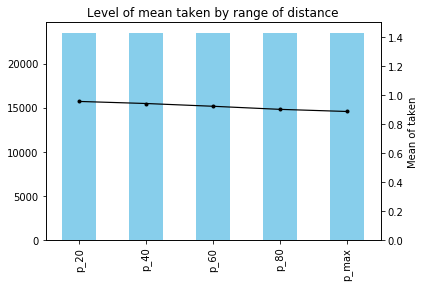

In [21]:
fig = plt.figure()

ax = df_i3['ctd_taken'].plot(kind='bar',color='skyblue',grid=False)
ax2 = ax.twinx()
ax2.plot(df_i3['mean_taken'].values,marker='.',linestyle='-', linewidth=1.2,color='black')
indice = np.arange(5)   # Declara un array

plt.title("Level of mean taken by range of distance")
plt.xlabel("Range of distance")
plt.ylabel("Mean of taken")
plt.ylim(0,1.5)
plt.xticks(indice, df_i3['p_to_user_distance']) 
plt.show();

In [22]:
df_i1 = df[["p_to_user_elevation","taken"]].groupby(["p_to_user_elevation"]).mean().reset_index()
df_i2= df[["p_to_user_elevation","taken"]].groupby(["p_to_user_elevation"]).count().reset_index()

df_i1 = df_i1.rename(columns = {'taken': 'mean_taken'}, inplace = False)
df_i2 = df_i2.rename(columns = {'taken': 'ctd_taken'}, inplace = False)

df_i3= df_i1.merge(df_i2, on='p_to_user_elevation', how='left')
df_i3.sort_values(by=['p_to_user_elevation'])
df_i3

,p_to_user_elevation,mean_taken,ctd_taken
0,p_20,0.906739,23504
1,p_40,0.922488,23506
2,p_60,0.929833,23501
3,p_80,0.927669,23503
4,p_max,0.918482,23504


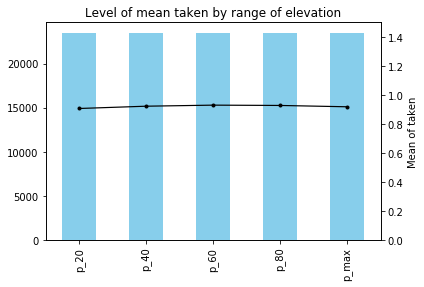

In [23]:
fig = plt.figure()

ax = df_i3['ctd_taken'].plot(kind='bar',color='skyblue',grid=False)
ax2 = ax.twinx()
ax2.plot(df_i3['mean_taken'].values,marker='.',linestyle='-', linewidth=1.2,color='black')
indice = np.arange(5)   # Declara un array

plt.title("Level of mean taken by range of elevation")
plt.xlabel("Range of elevation")
plt.ylabel("Mean of taken")
plt.ylim(0,1.5)
plt.xticks(indice, df_i3['p_to_user_elevation']) 
plt.show();

In [25]:
df_i1 = df[["p_total_earning","taken"]].groupby(["p_total_earning"]).mean().reset_index()
df_i2= df[["p_total_earning","taken"]].groupby(["p_total_earning"]).count().reset_index()

df_i1 = df_i1.rename(columns = {'taken': 'mean_taken'}, inplace = False)
df_i2 = df_i2.rename(columns = {'taken': 'ctd_taken'}, inplace = False)

df_i3= df_i1.merge(df_i2, on='p_total_earning', how='left')
df_i3.sort_values(by=['p_total_earning'])
df_i3

,p_total_earning,mean_taken,ctd_taken
0,p_20,0.870814,22665
1,p_40,0.941635,17459
2,p_60,0.931521,27585
3,p_80,0.921699,21213
4,p_max,0.937684,28596


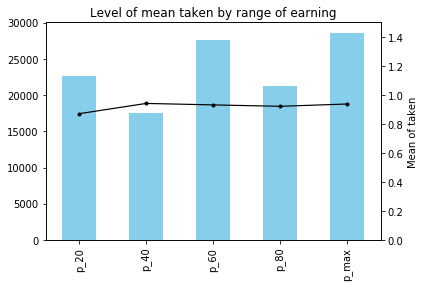

In [26]:
fig = plt.figure()

ax = df_i3['ctd_taken'].plot(kind='bar',color='skyblue',grid=False)
ax2 = ax.twinx()
ax2.plot(df_i3['mean_taken'].values,marker='.',linestyle='-', linewidth=1.2,color='black')
indice = np.arange(5)   # Declara un array

plt.title("Level of mean taken by range of earning")
plt.xlabel("Range of earning")
plt.ylabel("Mean of taken")
plt.ylim(0,1.5)
plt.xticks(indice, df_i3['p_total_earning']) 
plt.show();

In [27]:
from datetime import datetime

In [28]:
df['created_at2'] = pd.to_datetime(df['created_at'])
df['day_of_week'] = df["created_at2"].dt.dayofweek
df['hour_of_day']=df.created_at2.dt.hour
df

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,codmes,duplicados,p_to_user_distance,p_to_user_elevation,p_total_earning,created_at2,day_of_week,hour_of_day
0,14924129,900007722,2.188069,43.430176,5500,2017-09-17T14:36:51Z,1,201709,1,p_80,p_80,p_80,2017-09-17 14:36:51+00:00,6,14
1,15517560,900008156,0.970423,64.589722,5200,2017-09-28T12:33:04Z,1,201709,1,p_40,p_80,p_60,2017-09-28 12:33:04+00:00,3,12
2,15365462,900004503,2.699022,257.006104,6700,2017-09-25T12:43:57Z,1,201709,1,p_max,p_max,p_max,2017-09-25 12:43:57+00:00,0,12
3,14245605,900015422,0.725768,-42.870361,3200,2017-09-05T17:17:09Z,1,201709,1,p_40,p_20,p_20,2017-09-05 17:17:09+00:00,1,17
4,15213594,900011745,0.750715,-34.016602,5700,2017-09-22T21:38:58Z,1,201709,1,p_40,p_20,p_80,2017-09-22 21:38:58+00:00,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117584,15048263,900009494,0.402109,-22.629395,6200,2017-09-19T19:42:54Z,1,201709,1,p_20,p_40,p_80,2017-09-19 19:42:54+00:00,1,19
117585,15789217,900008201,0.374944,-4.408203,3200,2017-10-02T18:29:02Z,1,201710,1,p_20,p_40,p_20,2017-10-02 18:29:02+00:00,0,18
117586,15636112,900009494,2.836608,-89.113770,8050,2017-09-30T13:11:03Z,0,201709,1,p_max,p_20,p_max,2017-09-30 13:11:03+00:00,5,13
117587,14639888,30000253,2.724799,21.098999,3900,2017-09-12T12:33:08Z,0,201709,1,p_max,p_60,p_20,2017-09-12 12:33:08+00:00,1,12


In [29]:
df_i1 = df[["day_of_week","taken"]].groupby(["day_of_week"]).mean().reset_index()
df_i2= df[["day_of_week","taken"]].groupby(["day_of_week"]).count().reset_index()

df_i1 = df_i1.rename(columns = {'taken': 'mean_taken'}, inplace = False)
df_i2 = df_i2.rename(columns = {'taken': 'ctd_taken'}, inplace = False)

df_i3= df_i1.merge(df_i2, on='day_of_week', how='left')
df_i3.sort_values(by=['day_of_week'])
df_i3

,day_of_week,mean_taken,ctd_taken
0,0,0.911934,11991
1,1,0.924389,16889
2,2,0.930777,14865
3,3,0.910632,13092
4,4,0.910666,17082
5,5,0.895807,19867
6,6,0.951500,23732


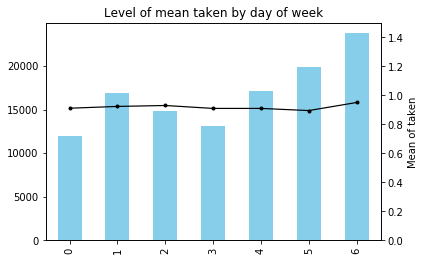

In [30]:
fig = plt.figure()

ax = df_i3['ctd_taken'].plot(kind='bar',color='skyblue',grid=False)
ax2 = ax.twinx()
ax2.plot(df_i3['mean_taken'].values,marker='.',linestyle='-', linewidth=1.2,color='black')
indice = np.arange(7)   # Declara un array

plt.title("Level of mean taken by day of week")
plt.xlabel("Range of earning")
plt.ylabel("Mean of taken")
plt.ylim(0,1.5)
plt.xticks(indice, df_i3['day_of_week']) 
plt.show();

In [31]:
df_i1 = df[["hour_of_day","taken"]].groupby(["hour_of_day"]).mean().reset_index()
df_i2= df[["hour_of_day","taken"]].groupby(["hour_of_day"]).count().reset_index()

df_i1 = df_i1.rename(columns = {'taken': 'mean_taken'}, inplace = False)
df_i2 = df_i2.rename(columns = {'taken': 'ctd_taken'}, inplace = False)

df_i3= df_i1.merge(df_i2, on='hour_of_day', how='left')
df_i3.sort_values(by=['hour_of_day'])
df_i3

,hour_of_day,mean_taken,ctd_taken
0,0,0.837535,357
1,1,0.708661,254
2,2,0.688406,138
3,3,0.644231,104
4,4,0.603175,63
5,5,0.500000,26
6,6,0.881818,110
7,7,0.956825,718
8,8,0.961299,1447
9,9,0.957314,1921


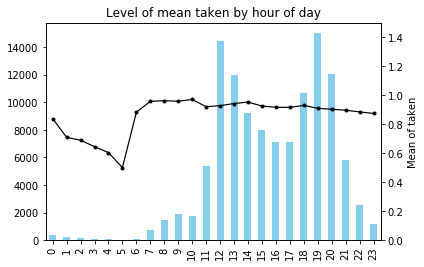

In [32]:
fig = plt.figure()

ax = df_i3['ctd_taken'].plot(kind='bar',color='skyblue',grid=False)
ax2 = ax.twinx()
ax2.plot(df_i3['mean_taken'].values,marker='.',linestyle='-', linewidth=1.2,color='black')
indice = np.arange(24)   # Declara un array

plt.title("Level of mean taken by hour of day")
plt.xlabel("Range of earning")
plt.ylabel("Mean of taken")
plt.ylim(0,1.5)
plt.xticks(indice, df_i3['hour_of_day']) 
plt.show();

In [33]:
df

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,codmes,duplicados,p_to_user_distance,p_to_user_elevation,p_total_earning,created_at2,day_of_week,hour_of_day
0,14924129,900007722,2.188069,43.430176,5500,2017-09-17T14:36:51Z,1,201709,1,p_80,p_80,p_80,2017-09-17 14:36:51+00:00,6,14
1,15517560,900008156,0.970423,64.589722,5200,2017-09-28T12:33:04Z,1,201709,1,p_40,p_80,p_60,2017-09-28 12:33:04+00:00,3,12
2,15365462,900004503,2.699022,257.006104,6700,2017-09-25T12:43:57Z,1,201709,1,p_max,p_max,p_max,2017-09-25 12:43:57+00:00,0,12
3,14245605,900015422,0.725768,-42.870361,3200,2017-09-05T17:17:09Z,1,201709,1,p_40,p_20,p_20,2017-09-05 17:17:09+00:00,1,17
4,15213594,900011745,0.750715,-34.016602,5700,2017-09-22T21:38:58Z,1,201709,1,p_40,p_20,p_80,2017-09-22 21:38:58+00:00,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117584,15048263,900009494,0.402109,-22.629395,6200,2017-09-19T19:42:54Z,1,201709,1,p_20,p_40,p_80,2017-09-19 19:42:54+00:00,1,19
117585,15789217,900008201,0.374944,-4.408203,3200,2017-10-02T18:29:02Z,1,201710,1,p_20,p_40,p_20,2017-10-02 18:29:02+00:00,0,18
117586,15636112,900009494,2.836608,-89.113770,8050,2017-09-30T13:11:03Z,0,201709,1,p_max,p_20,p_max,2017-09-30 13:11:03+00:00,5,13
117587,14639888,30000253,2.724799,21.098999,3900,2017-09-12T12:33:08Z,0,201709,1,p_max,p_60,p_20,2017-09-12 12:33:08+00:00,1,12


In [34]:
df["p_hour"]=np.where(df['hour_of_day']<6, 'madrugada',
                   np.where(df['hour_of_day']<11, 'mañana',
                   np.where(df['hour_of_day']<18, 'tarde','noche')))

In [35]:
df_i1 = df[["p_hour","taken"]].groupby(["p_hour"]).mean().reset_index()
df_i2= df[["p_hour","taken"]].groupby(["p_hour"]).count().reset_index()

df_i1 = df_i1.rename(columns = {'taken': 'mean_taken'}, inplace = False)
df_i2 = df_i2.rename(columns = {'taken': 'ctd_taken'}, inplace = False)

df_i3= df_i1.merge(df_i2, on='p_hour', how='left')
df_i3.sort_values(by=['p_hour'])
df_i3

,p_hour,mean_taken,ctd_taken
0,madrugada,0.734607,942
1,mañana,0.960599,5939
2,noche,0.907914,47369
3,tarde,0.929933,63268


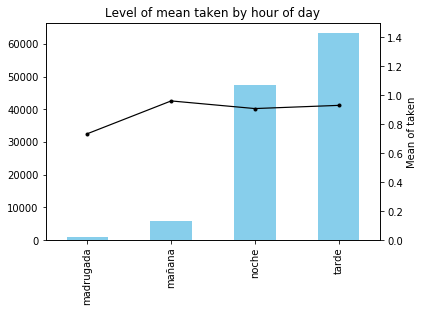

In [36]:
fig = plt.figure()

ax = df_i3['ctd_taken'].plot(kind='bar',color='skyblue',grid=False)
ax2 = ax.twinx()
ax2.plot(df_i3['mean_taken'].values,marker='.',linestyle='-', linewidth=1.2,color='black')
indice = np.arange(4)   # Declara un array

plt.title("Level of mean taken by hour of day")
plt.xlabel("Range of earning")
plt.ylabel("Mean of taken")
plt.ylim(0,1.5)
plt.xticks(indice, df_i3['p_hour']) 
plt.show();

In [37]:
set(df.taken)

{0, 1}

In [38]:
df["to_user_elevation_abs"]=df["to_user_elevation"].abs()
df["to_user_distance_abs"]=df["to_user_distance"].abs()

In [39]:
df

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,codmes,duplicados,p_to_user_distance,p_to_user_elevation,p_total_earning,created_at2,day_of_week,hour_of_day,p_hour,to_user_elevation_abs,to_user_distance_abs
0,14924129,900007722,2.188069,43.430176,5500,2017-09-17T14:36:51Z,1,201709,1,p_80,p_80,p_80,2017-09-17 14:36:51+00:00,6,14,tarde,43.430176,2.188069
1,15517560,900008156,0.970423,64.589722,5200,2017-09-28T12:33:04Z,1,201709,1,p_40,p_80,p_60,2017-09-28 12:33:04+00:00,3,12,tarde,64.589722,0.970423
2,15365462,900004503,2.699022,257.006104,6700,2017-09-25T12:43:57Z,1,201709,1,p_max,p_max,p_max,2017-09-25 12:43:57+00:00,0,12,tarde,257.006104,2.699022
3,14245605,900015422,0.725768,-42.870361,3200,2017-09-05T17:17:09Z,1,201709,1,p_40,p_20,p_20,2017-09-05 17:17:09+00:00,1,17,tarde,42.870361,0.725768
4,15213594,900011745,0.750715,-34.016602,5700,2017-09-22T21:38:58Z,1,201709,1,p_40,p_20,p_80,2017-09-22 21:38:58+00:00,4,21,noche,34.016602,0.750715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117584,15048263,900009494,0.402109,-22.629395,6200,2017-09-19T19:42:54Z,1,201709,1,p_20,p_40,p_80,2017-09-19 19:42:54+00:00,1,19,noche,22.629395,0.402109
117585,15789217,900008201,0.374944,-4.408203,3200,2017-10-02T18:29:02Z,1,201710,1,p_20,p_40,p_20,2017-10-02 18:29:02+00:00,0,18,noche,4.408203,0.374944
117586,15636112,900009494,2.836608,-89.113770,8050,2017-09-30T13:11:03Z,0,201709,1,p_max,p_20,p_max,2017-09-30 13:11:03+00:00,5,13,tarde,89.113770,2.836608
117587,14639888,30000253,2.724799,21.098999,3900,2017-09-12T12:33:08Z,0,201709,1,p_max,p_60,p_20,2017-09-12 12:33:08+00:00,1,12,tarde,21.098999,2.724799


In [40]:
colors={0:"Crimson",1:"RoyalBlue"}
taken_colors=df.taken.map(colors)

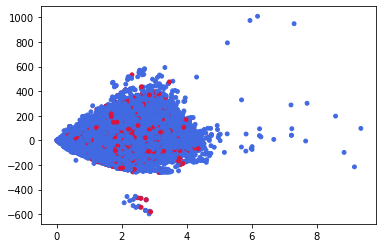

In [41]:
fix,ax=plt.subplots()
ax.scatter(df.to_user_distance,df.to_user_elevation,color=taken_colors,s=15)
plt.show()


In [42]:
datatypes = df.dtypes 
  
datatypes

order_id                               int64
store_id                               int64
to_user_distance                     float64
to_user_elevation                    float64
total_earning                          int64
created_at                            object
taken                                  int64
codmes                                 int64
duplicados                             int64
p_to_user_distance                    object
p_to_user_elevation                   object
p_total_earning                       object
created_at2              datetime64[ns, UTC]
day_of_week                            int64
hour_of_day                            int64
p_hour                                object
to_user_elevation_abs                float64
to_user_distance_abs                 float64
dtype: object

# 2. Classification model

In [43]:
############################################ VARIABLES ################################################
llaves = ['order_id','store_id']
target = 'taken'
variables = ['to_user_distance','to_user_elevation','total_earning','day_of_week','p_hour']

In [44]:
#Objetos que no son continuos
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
obj_feat

['created_at',
 'p_to_user_distance',
 'p_to_user_elevation',
 'p_total_earning',
 'p_hour']

In [45]:
#pasamos los objetos a categóricos
for feature in obj_feat:
    df[feature] = pd.Series(df[feature], dtype="category")

In [46]:
#Dividimos la data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.20, random_state = 100) 

In [47]:
def run_lgbm(train_70, watch_30, variables,target):
  
  x_train = train_70[variables]
  x_watch = watch_30[variables]
  y_train = train_70[target]
  y_watch = watch_30[target]
  
  #Data Train para modelamiento
  d_train = lgb.Dataset(x_train, label=y_train,free_raw_data=False)
  d_watch  = lgb.Dataset(x_watch, label=y_watch,free_raw_data=False)
  
  #Hiperparámetros del LightGBM SOL
  params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc ',
        'eval_metric' :'l2',
        'subsample': 0.67,
        "subsample_freq": 7,
        "colsample_bytree":0.61,
        "num_threads": 35,
        "max_depth":9,
        "num_leaves":234,
        'learning_rate': 0.018636743745712676,
        "min_child_samples": 480,
        'min_child_weight': 99,
        "lambda_l1":0.83,
        "lambda_l2":0.89,
        "min_gain_to_split": 0.14851102865803123,
        'n_jobs' : 36,
        'verbose': 1,
        'feature_name': 'auto',
        'random_seed':0
        #'categorical_feature': 'auto'
    }

  
  clf = lgb.train(params,d_train,num_boost_round=10000,valid_sets=d_watch,early_stopping_rounds=50,verbose_eval=25)
  
  return clf

In [48]:
clf_rcc = run_lgbm(train, test, variables, target)
var_ind = clf_rcc.feature_name()

C:\Users\ariss\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ariss\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ariss\anaconda3\lib\site-packages\lightgbm\basic.py:1487: UserWarning: feature_name keyword has been found in `params` and will be ignored.
Please use feature_name argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `param

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] num_threads is set=35, n_jobs=36 will be ignored. Current value: num_threads=35
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] num_threads is set=35, n_jobs=36 will be ignored. Current value: num_threads=35
[LightGBM] [Info] Number of positive: 86576, number of negative: 7438
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 94014, number of used features: 5
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] num_threads is set=35, n_jobs=36 will 

In [49]:

############################### IMPORTANCIA VARIABLES #########################################

features = pd.DataFrame(data=clf_rcc.feature_importance(),index=clf_rcc.feature_name(),columns=['feature_importance_LIGHTGBM'])
features = features.sort_values(by='feature_importance_LIGHTGBM',ascending=False)
features

,feature_importance_LIGHTGBM
to_user_elevation,8237
to_user_distance,8046
total_earning,6451
day_of_week,2996
p_hour,1648


In [50]:
var_ind = clf_rcc.feature_name()
preds = clf_rcc.predict(test[var_ind])

In [51]:
#predicción
test_preds = clf_rcc.predict(test[variables])
train_preds = clf_rcc.predict(train[variables])
test_preds = [1 if pred > 0.7104966721105328 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.7104966721105328 else 0 for pred in train_preds]

## Precisión

In [52]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_preds, test[target])
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(test[target], test_preds)))

LightGBM Model accuracy score: 0.9172


In [53]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(train_preds, train[target])
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(train[target], train_preds)))

LightGBM Model accuracy score: 0.9182


## ROC - AUC

In [54]:
roc_auc_score(test[target], preds)

0.7104966721105328

In [55]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test[target], preds, pos_label=1)

In [56]:
thresh1

array([1.98991189, 0.98991189, 0.98781296, ..., 0.54085459, 0.53115501,
       0.49209881])

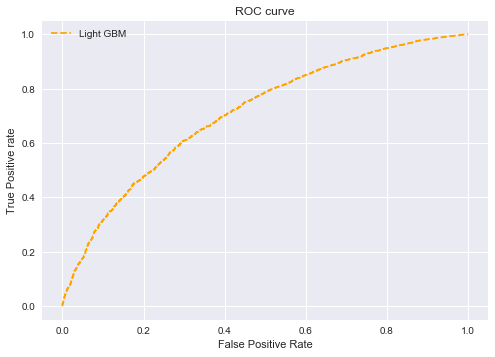

In [57]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Light GBM')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Matriz Confusión

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test[target], test_preds)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  112  1729]
 [  216 21447]]


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train[target], train_preds)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  614  6824]
 [  870 85706]]


## Probando en muestra test por fuera


In [61]:
df_test = pd.read_csv("orders_test.csv")

In [63]:
df = df_test

In [64]:
df["codmes"]=pd.DatetimeIndex(df['created_at']).year*100 + pd.DatetimeIndex(df['created_at']).month

In [65]:
df.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,codmes
0,14368568,30000048,1.865569,212.173218,4200,2017-09-07T20:17:17Z,201709
1,14367873,900011220,1.113147,12.240356,5200,2017-09-07T20:18:15Z,201709
2,14369202,900008202,2.885515,47.449707,3600,2017-09-07T20:07:23Z,201709
3,14370107,900007625,1.545066,172.211182,3200,2017-09-07T20:19:16Z,201709
4,14371461,900003685,2.393699,42.583374,3700,2017-09-07T20:25:20Z,201709


In [66]:
df.shape

(29398, 7)

In [67]:
datatypes = df.dtypes 
  
datatypes

order_id               int64
store_id               int64
to_user_distance     float64
to_user_elevation    float64
total_earning          int64
created_at            object
codmes                 int64
dtype: object

In [68]:
df.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,codmes
count,2.939800e+04,2.939800e+04,29398.000000,29398.000000,29398.000000,29398.000000
mean,1.507766e+07,7.585114e+08,1.501222,27.156573,5379.157494,201709.126913
std,4.761875e+05,3.210235e+08,0.844213,84.736173,1897.956415,0.332882
min,1.421081e+07,3.000000e+07,0.002456,-598.296875,0.000000,201709.000000
25%,1.467159e+07,9.000045e+08,0.841436,-18.235870,4200.000000,201709.000000
50%,1.509032e+07,9.000077e+08,1.389905,11.502136,5200.000000,201709.000000
75%,1.547437e+07,9.000127e+08,2.031556,60.512360,6350.000000,201709.000000
max,1.590240e+07,9.000172e+08,9.078181,826.482788,108200.000000,201710.000000


In [69]:
df2=df[["order_id","store_id"]].groupby(["order_id"]).count()

In [70]:
df3=df2[df2.store_id>1]
df3.shape

(3, 1)

In [71]:
df.shape

(29398, 7)

In [72]:
df2 = df2.rename(columns = {'store_id': 'duplicados'}, inplace = False)
df= df.merge(df2, on='order_id', how='left')
df.sort_values(by=['order_id'])

df=df[df.duplicados==1]

df


,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,codmes,duplicados
0,14368568,30000048,1.865569,212.173218,4200,2017-09-07T20:17:17Z,201709,1
1,14367873,900011220,1.113147,12.240356,5200,2017-09-07T20:18:15Z,201709,1
2,14369202,900008202,2.885515,47.449707,3600,2017-09-07T20:07:23Z,201709,1
3,14370107,900007625,1.545066,172.211182,3200,2017-09-07T20:19:16Z,201709,1
4,14371461,900003685,2.393699,42.583374,3700,2017-09-07T20:25:20Z,201709,1
...,...,...,...,...,...,...,...,...
29393,15649684,900013015,0.748878,-1.040649,3200,2017-09-30T15:55:02Z,201709,1
29394,15650073,900009494,2.066956,-105.615479,5200,2017-09-30T16:02:01Z,201709,1
29395,15650610,900007110,3.288757,216.614868,5000,2017-09-30T16:13:03Z,201709,1
29396,15651770,900015954,3.214688,79.939087,6100,2017-09-30T16:20:01Z,201709,1


In [73]:
df.shape

(29392, 8)

In [74]:
p_20_distance=stats.scoreatpercentile(df[["to_user_distance"]], 20)
p_40_distance=stats.scoreatpercentile(df[["to_user_distance"]], 40)
p_60_distance=stats.scoreatpercentile(df[["to_user_distance"]], 60)
p_80_distance=stats.scoreatpercentile(df[["to_user_distance"]], 80)

p_20_elevation=stats.scoreatpercentile(df[["to_user_elevation"]], 20)
p_40_elevation=stats.scoreatpercentile(df[["to_user_elevation"]], 40)
p_60_elevation=stats.scoreatpercentile(df[["to_user_elevation"]], 60)
p_80_elevation=stats.scoreatpercentile(df[["to_user_elevation"]], 80)

p_20_earning=stats.scoreatpercentile(df[["total_earning"]], 20)
p_40_earning=stats.scoreatpercentile(df[["total_earning"]], 40)
p_60_earning=stats.scoreatpercentile(df[["total_earning"]], 60)
p_80_earning=stats.scoreatpercentile(df[["total_earning"]], 80)


In [75]:
df["p_to_user_distance"]=np.where(df['to_user_distance']<p_20_distance, 'p_20',
                   np.where(df['to_user_distance']<p_40_distance, 'p_40',
                   np.where(df['to_user_distance']<p_60_distance, 'p_60',
                   np.where(df['to_user_distance']<p_80_distance, 'p_80','p_max'))))

df["p_to_user_elevation"]=np.where(df['to_user_elevation']<p_20_elevation, 'p_20',
                   np.where(df['to_user_elevation']<p_40_elevation, 'p_40',
                   np.where(df['to_user_elevation']<p_60_elevation, 'p_60',
                   np.where(df['to_user_elevation']<p_80_elevation, 'p_80','p_max'))))

df["p_total_earning"]=np.where(df['total_earning']<p_20_earning, 'p_20',
                   np.where(df['total_earning']<p_40_earning, 'p_40',
                   np.where(df['total_earning']<p_60_earning, 'p_60',
                   np.where(df['total_earning']<p_80_earning, 'p_80','p_max'))))



In [76]:
from datetime import datetime

In [77]:
df['created_at2'] = pd.to_datetime(df['created_at'])
df['day_of_week'] = df["created_at2"].dt.dayofweek
df['hour_of_day']=df.created_at2.dt.hour
df

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,codmes,duplicados,p_to_user_distance,p_to_user_elevation,p_total_earning,created_at2,day_of_week,hour_of_day
0,14368568,30000048,1.865569,212.173218,4200,2017-09-07T20:17:17Z,201709,1,p_80,p_max,p_40,2017-09-07 20:17:17+00:00,3,20
1,14367873,900011220,1.113147,12.240356,5200,2017-09-07T20:18:15Z,201709,1,p_40,p_60,p_60,2017-09-07 20:18:15+00:00,3,20
2,14369202,900008202,2.885515,47.449707,3600,2017-09-07T20:07:23Z,201709,1,p_max,p_80,p_20,2017-09-07 20:07:23+00:00,3,20
3,14370107,900007625,1.545066,172.211182,3200,2017-09-07T20:19:16Z,201709,1,p_60,p_max,p_20,2017-09-07 20:19:16+00:00,3,20
4,14371461,900003685,2.393699,42.583374,3700,2017-09-07T20:25:20Z,201709,1,p_max,p_80,p_20,2017-09-07 20:25:20+00:00,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29393,15649684,900013015,0.748878,-1.040649,3200,2017-09-30T15:55:02Z,201709,1,p_40,p_40,p_20,2017-09-30 15:55:02+00:00,5,15
29394,15650073,900009494,2.066956,-105.615479,5200,2017-09-30T16:02:01Z,201709,1,p_80,p_20,p_60,2017-09-30 16:02:01+00:00,5,16
29395,15650610,900007110,3.288757,216.614868,5000,2017-09-30T16:13:03Z,201709,1,p_max,p_max,p_60,2017-09-30 16:13:03+00:00,5,16
29396,15651770,900015954,3.214688,79.939087,6100,2017-09-30T16:20:01Z,201709,1,p_max,p_max,p_80,2017-09-30 16:20:01+00:00,5,16


In [78]:
df["p_hour"]=np.where(df['hour_of_day']<6, 'madrugada',
                   np.where(df['hour_of_day']<11, 'mañana',
                   np.where(df['hour_of_day']<18, 'tarde','noche')))

In [79]:
df["to_user_elevation_abs"]=df["to_user_elevation"].abs()
df["to_user_distance_abs"]=df["to_user_distance"].abs()

In [80]:
df

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,codmes,duplicados,p_to_user_distance,p_to_user_elevation,p_total_earning,created_at2,day_of_week,hour_of_day,p_hour,to_user_elevation_abs,to_user_distance_abs
0,14368568,30000048,1.865569,212.173218,4200,2017-09-07T20:17:17Z,201709,1,p_80,p_max,p_40,2017-09-07 20:17:17+00:00,3,20,noche,212.173218,1.865569
1,14367873,900011220,1.113147,12.240356,5200,2017-09-07T20:18:15Z,201709,1,p_40,p_60,p_60,2017-09-07 20:18:15+00:00,3,20,noche,12.240356,1.113147
2,14369202,900008202,2.885515,47.449707,3600,2017-09-07T20:07:23Z,201709,1,p_max,p_80,p_20,2017-09-07 20:07:23+00:00,3,20,noche,47.449707,2.885515
3,14370107,900007625,1.545066,172.211182,3200,2017-09-07T20:19:16Z,201709,1,p_60,p_max,p_20,2017-09-07 20:19:16+00:00,3,20,noche,172.211182,1.545066
4,14371461,900003685,2.393699,42.583374,3700,2017-09-07T20:25:20Z,201709,1,p_max,p_80,p_20,2017-09-07 20:25:20+00:00,3,20,noche,42.583374,2.393699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29393,15649684,900013015,0.748878,-1.040649,3200,2017-09-30T15:55:02Z,201709,1,p_40,p_40,p_20,2017-09-30 15:55:02+00:00,5,15,tarde,1.040649,0.748878
29394,15650073,900009494,2.066956,-105.615479,5200,2017-09-30T16:02:01Z,201709,1,p_80,p_20,p_60,2017-09-30 16:02:01+00:00,5,16,tarde,105.615479,2.066956
29395,15650610,900007110,3.288757,216.614868,5000,2017-09-30T16:13:03Z,201709,1,p_max,p_max,p_60,2017-09-30 16:13:03+00:00,5,16,tarde,216.614868,3.288757
29396,15651770,900015954,3.214688,79.939087,6100,2017-09-30T16:20:01Z,201709,1,p_max,p_max,p_80,2017-09-30 16:20:01+00:00,5,16,tarde,79.939087,3.214688


In [81]:
datatypes = df.dtypes 
  
datatypes

order_id                               int64
store_id                               int64
to_user_distance                     float64
to_user_elevation                    float64
total_earning                          int64
created_at                            object
codmes                                 int64
duplicados                             int64
p_to_user_distance                    object
p_to_user_elevation                   object
p_total_earning                       object
created_at2              datetime64[ns, UTC]
day_of_week                            int64
hour_of_day                            int64
p_hour                                object
to_user_elevation_abs                float64
to_user_distance_abs                 float64
dtype: object

In [82]:
############################################ VARIABLES ################################################
llaves = ['order_id','store_id']
target = 'taken'
variables = ['to_user_distance','to_user_elevation','total_earning','day_of_week','p_hour']

In [83]:
#Objetos que no son continuos
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
obj_feat

['created_at',
 'p_to_user_distance',
 'p_to_user_elevation',
 'p_total_earning',
 'p_hour']

In [84]:
#pasamos los objetos a categóricos
for feature in obj_feat:
    df[feature] = pd.Series(df[feature], dtype="category")

## Puntuando base Test


In [85]:
var_ind = clf_rcc.feature_name()
preds = clf_rcc.predict(df[var_ind])

In [86]:
#predicción
test_preds = clf_rcc.predict(df[variables])
test_preds = [1 if pred > 0.7136 else 0 for pred in test_preds]

In [87]:
df_preds = pd.DataFrame(test_preds)

In [88]:
df_preds

,0
0,1
1,1
2,1
3,1
4,1
...,...
29387,1
29388,1
29389,1
29390,1


In [91]:
df_preds = pd.concat([df, df_preds], axis=1)
df_preds

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,codmes,duplicados,p_to_user_distance,p_to_user_elevation,...,p_to_user_distance,p_to_user_elevation,p_total_earning,created_at2,day_of_week,hour_of_day,p_hour,to_user_elevation_abs,to_user_distance_abs,0
0,14368568.0,30000048.0,1.865569,212.173218,4200.0,2017-09-07T20:17:17Z,201709.0,1.0,p_80,p_max,...,p_80,p_max,p_40,2017-09-07 20:17:17+00:00,3.0,20.0,noche,212.173218,1.865569,1.0
1,14367873.0,900011220.0,1.113147,12.240356,5200.0,2017-09-07T20:18:15Z,201709.0,1.0,p_40,p_60,...,p_40,p_60,p_60,2017-09-07 20:18:15+00:00,3.0,20.0,noche,12.240356,1.113147,1.0
2,14369202.0,900008202.0,2.885515,47.449707,3600.0,2017-09-07T20:07:23Z,201709.0,1.0,p_max,p_80,...,p_max,p_80,p_20,2017-09-07 20:07:23+00:00,3.0,20.0,noche,47.449707,2.885515,1.0
3,14370107.0,900007625.0,1.545066,172.211182,3200.0,2017-09-07T20:19:16Z,201709.0,1.0,p_60,p_max,...,p_60,p_max,p_20,2017-09-07 20:19:16+00:00,3.0,20.0,noche,172.211182,1.545066,1.0
4,14371461.0,900003685.0,2.393699,42.583374,3700.0,2017-09-07T20:25:20Z,201709.0,1.0,p_max,p_80,...,p_max,p_80,p_20,2017-09-07 20:25:20+00:00,3.0,20.0,noche,42.583374,2.393699,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29393,15649684.0,900013015.0,0.748878,-1.040649,3200.0,2017-09-30T15:55:02Z,201709.0,1.0,p_40,p_40,...,p_40,p_40,p_20,2017-09-30 15:55:02+00:00,5.0,15.0,tarde,1.040649,0.748878,NaN
29394,15650073.0,900009494.0,2.066956,-105.615479,5200.0,2017-09-30T16:02:01Z,201709.0,1.0,p_80,p_20,...,p_80,p_20,p_60,2017-09-30 16:02:01+00:00,5.0,16.0,tarde,105.615479,2.066956,NaN
29395,15650610.0,900007110.0,3.288757,216.614868,5000.0,2017-09-30T16:13:03Z,201709.0,1.0,p_max,p_max,...,p_max,p_max,p_60,2017-09-30 16:13:03+00:00,5.0,16.0,tarde,216.614868,3.288757,NaN
29396,15651770.0,900015954.0,3.214688,79.939087,6100.0,2017-09-30T16:20:01Z,201709.0,1.0,p_max,p_max,...,p_max,p_max,p_80,2017-09-30 16:20:01+00:00,5.0,16.0,tarde,79.939087,3.214688,NaN


In [92]:
df_preds.to_csv('order_predictions.csv')

# 3. Explication

Se elaboró un análisis exploratorio incial para revisar la composicion de las variables, la variabilidad y tendencia de estas. Primero se revisó si habian duplicados y se encontró que había órdene con registros duplicados a excepcion del campo fecha por lo que se procedió a eliminarse para evitar ensuciar los análisis.

Posterior a eso se categorizó las variables continuas (elevacion, ganancia, distancia) en base a sus quintiles y se grafico con el target promedio para evaluar la tendencia y sentido de las variables.

Como parte final del analisis EDA se decidió aprovechar la variable fecha extrayendo el campo dia de la semana y hora del día para ver la tendencia de los pedidos en base estos campos, además se agrupo las variables horas del día para evitar un sobreentrenamiento del modelo en los pasos posteriores.

Posterior a eso se paso a contruir un modelo machine learning, para esta ocasión se utilizó el modelo lightgbm y se usó como métrica de optimización el log-losss. Para medir los resultados finales del modelo se uso la precision donde se obtuvo un 91% en train. finalmente para definir el punto de corte se utilizó la curva roc, la cual nos indico el punto optimo.

